In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load merged dataset (Day 3 output)
df = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data/processed/ev_merged_cleaned.csv")

df.head()


,country,iso_code,year,ev_share,population,total_chargers,charger_density_per_100k,population_million
0,Australia,AUS,2011,0.0061,22479723.0,0.0,0.0,22.479723
1,Australia,AUS,2012,0.0290,22852597.0,0.0,0.0,22.852597
2,Australia,AUS,2013,0.0330,23236224.0,0.0,0.0,23.236224
3,Australia,AUS,2014,0.1500,23595552.0,0.0,0.0,23.595552
4,Australia,AUS,2015,0.1900,23947955.0,0.0,0.0,23.947955


In [3]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("Numeric features:", numeric_cols)

# Basic statistics
df[numeric_cols].describe()



Numeric features: ['year', 'ev_share', 'population', 'total_chargers', 'charger_density_per_100k', 'population_million']


,year,ev_share,population,total_chargers,charger_density_per_100k,population_million
count,492.000000,492.000000,4.440000e+02,492.000000,444.000000,444.000000
mean,2017.239837,7.787549,4.084348e+08,2.156504,0.000714,408.434833
std,4.211733,14.904318,1.343228e+09,34.010629,0.010565,1343.228176
min,2010.000000,0.000150,3.208020e+05,0.000000,0.000000,0.320802
25%,2014.000000,0.147500,1.014597e+07,0.000000,0.000000,10.145970
50%,2017.000000,1.200000,3.906013e+07,0.000000,0.000000,39.060131
75%,2021.000000,7.600000,1.267243e+08,0.000000,0.000000,126.724278
max,2024.000000,92.000000,8.091735e+09,739.000000,0.217714,8091.734853


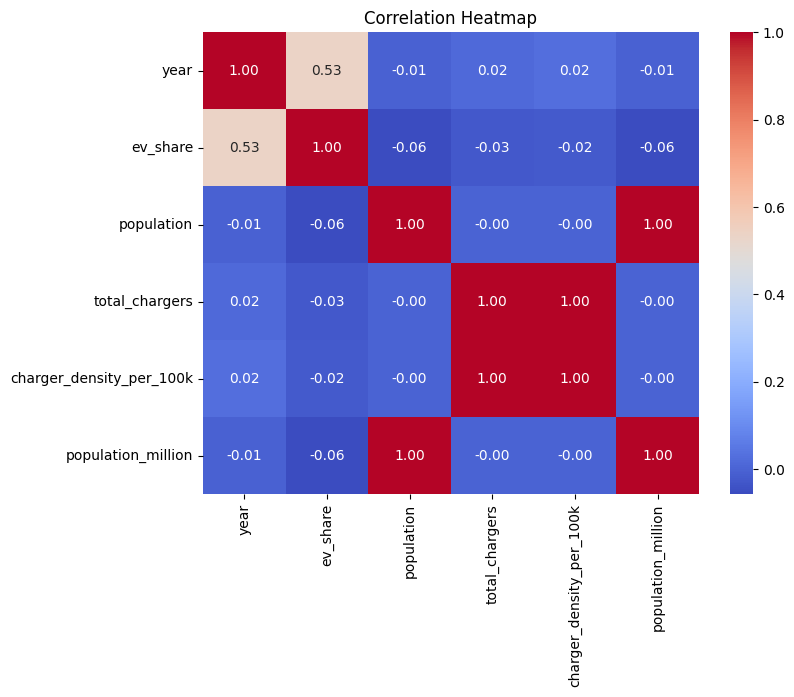

In [4]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


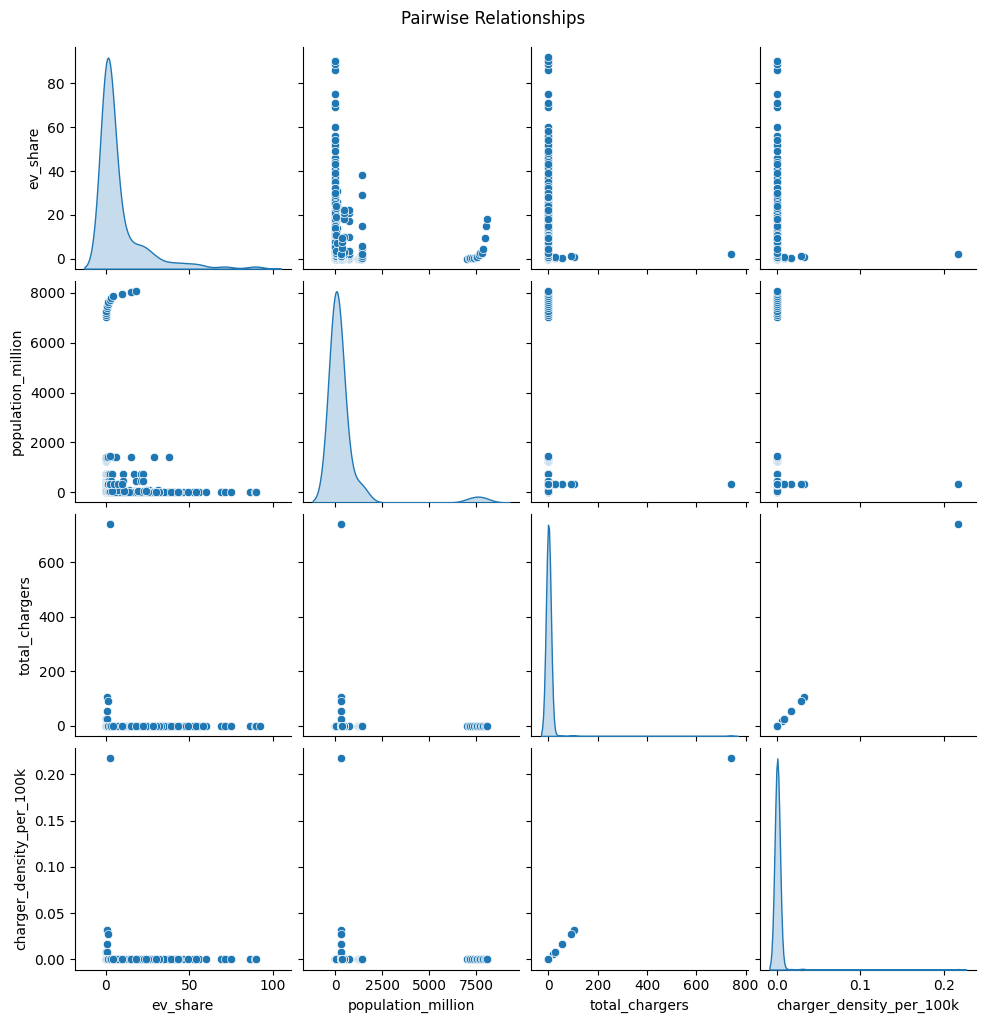

In [7]:
sns.pairplot(df[["ev_share", "population_million", "total_chargers", "charger_density_per_100k"]],
             diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [11]:
# EV share vs Total Chargers
df_corr1 = df.dropna(subset=["ev_share", "total_chargers"])
r1, p1 = stats.pearsonr(df_corr1["ev_share"], df_corr1["total_chargers"])
print(f"EV share vs Total Chargers → r={r1:.3f}, p={p1:.3e}")

# EV share vs Population
df_corr2 = df.dropna(subset=["ev_share", "population_million"])
r2, p2 = stats.pearsonr(df_corr2["ev_share"], df_corr2["population_million"])
print(f"EV share vs Population → r={r2:.3f}, p={p2:.3e}")

# EV share vs Charger Density
df_corr3 = df.dropna(subset=["ev_share", "charger_density_per_100k"])
r3, p3 = stats.pearsonr(df_corr3["ev_share"], df_corr3["charger_density_per_100k"])
print(f"EV share vs Charger Density → r={r3:.3f}, p={p3:.3e}")


EV share vs Total Chargers → r=-0.025, p=5.731e-01
EV share vs Population → r=-0.058, p=2.245e-01
EV share vs Charger Density → r=-0.024, p=6.079e-01


In [12]:
import statsmodels.api as sm

X = df["total_chargers"].fillna(0)
y = df["ev_share"].fillna(0)

# Add constant for intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ev_share   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3180
Date:                Fri, 22 Aug 2025   Prob (F-statistic):              0.573
Time:                        19:40:42   Log-Likelihood:                -2026.7
No. Observations:                 492   AIC:                             4057.
Df Residuals:                     490   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8116      0.674     11.